# Regression Project 





First, I am going to import the libraries I am going to use.

In [448]:
# Necessary imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
from bs4 import BeautifulSoup
import requests
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time, os
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV,  Ridge
%matplotlib inline

# Getting the Airbnb data using Webscraping

In [4]:
url = 'https://www.airbnb.com/s/NYC--NY/homes?adults=1&place_id=ChIJOwg_06VPwokRYv534QaPC8g&refinement_paths%5B%5D=%2Fhomes' 

response = requests.get(url)
response.status_code

200

In [5]:
page = response.text
soup = BeautifulSoup(page, "lxml")

print(soup.prettify())

<!DOCTYPE html>
<html data-is-hyperloop="true" dir="ltr" lang="en" xmlns:fb="http://ogp.me/ns/fb#">
 <head>
  <script>
   window.sherlock_firstbyte = window.performance && window.performance.timing ? window.performance.timing.responseStart : Number(new Date());
  </script>
  <script>
   !function(){"use strict";var n=window;const e="ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789+/",o=new RegExp(`^\\d{10}_[${e}]{16}$`);const t=/(?:^| )bev=(.*?)(?:;|$)/;let c=!1;function i(){if(c||"undefined"==typeof document)return null;c=!0;const n=(document.cookie||"").match(t);if(!n||2!==n.length)return null;const e=decodeURIComponent(n[1]);return function(n){return o.test(n)}(e)?e:null}!function(){try{if(n.bev=n.bev||i(),!n.bev){const o=function(){const n=[];for(let o=0;o<16;o+=1)n.push(e[Math.floor(Math.random()*e.length)]);return`${Math.floor(Date.now()/1e3)}_${n.join("")}`}();!function(n){const{hostname:e}=document.location,o="."+e.slice(e.indexOf("airbnb.")),t=new Date;t.setDate(

In [6]:
print(soup.find("div", class_="_8ssblpx").prettify())

<div class="_8ssblpx">
 <div class="_gig1e7">
  <div class="_1kmzzkf">
   <div class="_jve3un">
    <div class="_11ry7lz" data-testid="shimmer-legacy-listing-section-item">
     <div style="margin-top:12px;margin-bottom:24px">
      <div class="_7qp4lh">
      </div>
     </div>
     <div class="_7ibwsy">
      <div class="_1nz9l7j">
       <span aria-busy="true" style="display:block;height:100%;width:100%;background-color:white;border-radius:12px">
        <span class="_8kplbn" style="animation-play-state:running;height:100%;width:100%;border-radius:12px">
        </span>
       </span>
      </div>
      <div class="_gr9jto">
       <div style="margin-bottom:4px">
        <span aria-busy="true" style="display:block;height:18px;width:40%;background-color:white;border-radius:10px">
         <span class="_8kplbn" style="animation-play-state:running;height:100%;width:100%;border-radius:10px">
         </span>
        </span>
       </div>
       <span aria-busy="true" style="display:bloc

In [7]:
def get_data(block, tag, class_text):
    try:
        return block.find(tag, class_ = class_text).text
    except AttributeError:
        return ""
    return

In [59]:
chromedriver = "\ProgramData\Microsoft\Windows\Start Menu\Programs\chromedriver.exe" # path to the chromedriver executable
os.environ["webdriver.chrome.driver"] = chromedriver

In [60]:
driver = webdriver.Chrome(chromedriver)

In [216]:
driver.get('https://www.airbnb.com/s/NYC--NY/homes?adults=1&place_id=ChIJOwg_06VPwokRYv534QaPC8g&refinement_paths%5B%5D=%2Fhomes')

Extracting data from the first page of New York listings.

In [217]:
#this might not be needed
stays_list_NY = []
stays_dict_NY = {}
#url of stays in NY
url = 'https://www.airbnb.com/s/NYC--NY/homes?adults=1&place_id=ChIJOwg_06VPwokRYv534QaPC8g&refinement_paths%5B%5D=%2Fhomes' 
response = requests.get(url)
page = response.text
soup = BeautifulSoup(page, "lxml")

#loop into tags content to get datat of ads
for i in (soup.find_all("div", class_="_8ssblpx")):
    
    if (len(i.find_all("span", class_="_3hmsj"))>= 5):
        stay_type = str.strip(get_data(i, "div", "_1xzimiid"))

        ad_title = str.strip(get_data(i, "span", "_1whrsux9"))

        guests = i.find_all("span", class_="_3hmsj")[2].text

        bedrooms = i.find_all("span", class_="_3hmsj")[3].text

        beds = i.find_all("span", class_="_3hmsj")[4].text

        baths = i.find_all("span", class_="_3hmsj")[5].text

        rating = get_data(i, "span","_10fy1f8")
    
        reviews_no = get_data(i, "span","_a7a5sx")
    
        price = str.strip(get_data(i, "span", "_tyxjp1"))

        headers = ['stay type', 'ad title', 'guests', 'bedrooms', 'beds',
                  'baths','rating','number of reviews', 'price']
        stays_dict_NY = dict(zip(headers, [ stay_type,
                                        ad_title,
                                        guests,
                                        bedrooms,
                                        beds, 
                                        baths,
                                        rating,
                                        reviews_no,
                                        price]))
        stays_list_NY.append(stays_dict_NY)
driver.find_element_by_class_name('_za9j7e').click();

Getting data of stays in New York:

In [218]:
driver.get(url)

Extracting from pages (1 ~ 15).

In [219]:
#Extracting data from pages 2 to 15
n = 0
while n < 15:
    try:
        #get soup of current webpage
        url = driver.current_url
        response = requests.get(url)
        page = response.text
        soup = BeautifulSoup(page, "lxml")
        
        
        for i in (soup.find_all("div", class_="_8ssblpx")):
    
            if (len(i.find_all("span", class_="_3hmsj"))>= 5):
                stay_type = str.strip(get_data(i, "div", "_1xzimiid"))

                ad_title = str.strip(get_data(i, "span", "_1whrsux9"))

                guests = i.find_all("span", class_="_3hmsj")[2].text

                bedrooms = i.find_all("span", class_="_3hmsj")[3].text

                beds = i.find_all("span", class_="_3hmsj")[4].text

                baths = i.find_all("span", class_="_3hmsj")[5].text

                rating = get_data(i, "span","_10fy1f8")

                reviews_no = get_data(i, "span","_a7a5sx")

                price = str.strip(get_data(i, "span", "_tyxjp1"))

                headers = ['stay type', 'ad title', 'guests', 'bedrooms', 'beds',
                          'baths','rating','number of reviews', 'price']
                stays_dict_NY = dict(zip(headers, [ stay_type,
                                                ad_title,
                                                guests,
                                                bedrooms,
                                                beds, 
                                                baths,
                                                rating,
                                                reviews_no,
                                                price]))
                stays_list_NY.append(stays_dict_NY)
                
                
        driver.find_element_by_class_name('_za9j7e').click();
        time.sleep(30)
        n += 1
    except:
        time.sleep(60)
        continue

In [220]:
stays_df_NY = pd.DataFrame(stays_list_NY).replace("",np.nan)  #convert list of dict to df
stays_df_NY

,stay type,ad title,guests,bedrooms,beds,baths,rating,number of reviews,price
0,Entire rental unit in Hell's Kitchen,Hell's Kitchen Enclave: a Diamond in the Rough.,2 guests,Studio,1 bed,1 bath,4.58,(220 reviews),$69
1,Room in boutique hotel in Manhattan,DOUBLE SHARED BATHROOM,2 guests,1 bedroom,1 bed,4 shared baths,NaN,NaN,$60
2,Entire rental unit in Soho,Modern and charming 1BR in the heart of SoHo,4 guests,1 bedroom,2 beds,1 bath,NaN,NaN,$121
3,Entire rental unit in Queens,Charming Astoria studio on quiet tree-lined st...,2 guests,Studio,1 bed,1 bath,5.0,(3 reviews),$50
4,Entire serviced apartment in Greenpoint,Studio Loft: Cleaning CDC guidelines implemented,2 guests,Studio,1 bed,1 bath,4.75,(16 reviews),$129
...,...,...,...,...,...,...,...,...,...
155,Entire residential home in Midtown,Explore Manhattan-The Central at 5th by Hilton...,2 guests,Studio,1 bed,1 bath,NaN,NaN,$110
156,Private room in Flushing,Private room in flushing with private bathroom,2 guests,1 bedroom,1 bed,1 private bath,5.0,(5 reviews),$72
157,Entire rental unit in East Flatbush,Full of Light Studio - available for longer stays,2 guests,1 bedroom,1 bed,1 bath,4.75,(140 reviews),$77
158,Private room in Upper West Side,Big Room w/ private entrance and Private Bathr...,2 guests,1 bedroom,1 bed,1 shared bath,4.91,(11 reviews),$89


In [221]:
(stays_df_NY
 .groupby(["ad title"])
 .guests.count()
 .reset_index()
 .sort_values("guests", ascending=False)).head(40)

,ad title,guests
3,1 Bedroom in North Bergen 20 mins away from NYC.,3
38,Classic Brownstone Apartment,2
10,Amazing Loft: Cleaning CDC guidelines implemented,2
23,Boutique Hotel Midtown NYC (Single),2
28,"Central Park Apartment-sanitizers, air purifier",2
96,New York's newest and best hotel! King Bed,2
56,DOUBLE SHARED BATHROOM,2
128,Studio Loft: Cleaning CDC guidelines implemented,2
97,Newly Renovated 1 Bedroom Loft,2
12,Beautiful King Bed Hotel Room,2


# Scraping data of stays in Los Angeles

In [222]:
#this might not be needed
stays_list_LA = []
stays_dict_LA = {}
#url of stays in NY
url = 'https://www.airbnb.com/s/Los-Angeles--CA--United-States/homes?tab_id=home_tab&refinement_paths%5B%5D=%2Fhomes&flexible_trip_dates%5B%5D=october&flexible_trip_dates%5B%5D=september&flexible_trip_lengths%5B%5D=weekend_trip&date_picker_type=calendar&query=Los%20Angeles%2C%20CA%2C%20United%20States&place_id=ChIJE9on3F3HwoAR9AhGJW_fL-I&source=structured_search_input_header&search_type=autocomplete_click' 
response = requests.get(url)
page = response.text
soup = BeautifulSoup(page, "lxml")

#loop into tags content to get datat of ads
for i in (soup.find_all("div", class_="_8ssblpx")):
    
    if (len(i.find_all("span", class_="_3hmsj"))>= 5):
        stay_type = str.strip(get_data(i, "div", "_1xzimiid"))

        ad_title = str.strip(get_data(i, "span", "_1whrsux9"))

        guests = i.find_all("span", class_="_3hmsj")[2].text

        bedrooms = i.find_all("span", class_="_3hmsj")[3].text

        beds = i.find_all("span", class_="_3hmsj")[4].text

        baths = i.find_all("span", class_="_3hmsj")[5].text

        rating = get_data(i, "span","_10fy1f8")
    
        reviews_no = get_data(i, "span","_a7a5sx")
    
        price = str.strip(get_data(i, "span", "_tyxjp1"))

        headers = ['stay type', 'ad title', 'guests', 'bedrooms', 'beds',
                  'baths','rating','number of reviews', 'price']
        stays_dict_LA = dict(zip(headers, [ stay_type,
                                        ad_title,
                                        guests,
                                        bedrooms,
                                        beds, 
                                        baths,
                                        rating,
                                        reviews_no,
                                        price]))
        stays_list_LA.append(stays_dict_LA)
driver.find_element_by_class_name('_za9j7e').click();

In [223]:
driver.get(url)

In [224]:
#Extracting data from pages 2 to 15
n = 0
while n < 15:
    try:
        #get soup of current webpage
        url = driver.current_url
        response = requests.get(url)
        page = response.text
        soup = BeautifulSoup(page, "lxml")
        
        
        for i in (soup.find_all("div", class_="_8ssblpx")):
    
            if (len(i.find_all("span", class_="_3hmsj"))>= 5):
                stay_type = str.strip(get_data(i, "div", "_1xzimiid"))

                ad_title = str.strip(get_data(i, "span", "_1whrsux9"))

                guests = i.find_all("span", class_="_3hmsj")[2].text

                bedrooms = i.find_all("span", class_="_3hmsj")[3].text

                beds = i.find_all("span", class_="_3hmsj")[4].text

                baths = i.find_all("span", class_="_3hmsj")[5].text

                rating = get_data(i, "span","_10fy1f8")

                reviews_no = get_data(i, "span","_a7a5sx")

                price = str.strip(get_data(i, "span", "_tyxjp1"))

                headers = ['stay type', 'ad title', 'guests', 'bedrooms', 'beds',
                          'baths','rating','number of reviews', 'price']
                stays_dict_LA = dict(zip(headers, [ stay_type,
                                                ad_title,
                                                guests,
                                                bedrooms,
                                                beds, 
                                                baths,
                                                rating,
                                                reviews_no,
                                                price]))
                stays_list_LA.append(stays_dict_LA)
                
                
        driver.find_element_by_class_name('_za9j7e').click();
        time.sleep(30)
        n += 1
    except:
        time.sleep(60)
        continue

In [225]:
stays_df_LA = pd.DataFrame(stays_list_LA).replace("",np.nan)  #convert list of dict to df
stays_df_LA

,stay type,ad title,guests,bedrooms,beds,baths,rating,number of reviews,price
0,Entire guesthouse in Echo Park,Cozy Modern Guest House Echo Park,2 guests,Studio,1 bed,1 bath,4.89,(180 reviews),$90
1,Entire condominium (condo) in Del Rey,Modern 3 - Level Minimalist Loft by Beach,3 guests,1 bedroom,1 bed,1.5 baths,NaN,NaN,$96
2,Entire guesthouse in South LA,All-in-one cozy retreat!,3 guests,Studio,2 beds,1 bath,4.96,(138 reviews),$65
3,Entire guesthouse in Mid-Wilshire,Private cozy cottage in Los Angeles,2 guests,1 bedroom,1 bed,1 bath,4.91,(424 reviews),$70
4,Private room in Westchester/Playa Del Rey,Private Suite In Well Appointed Apartment Home...,1 guest,1 bedroom,1 bed,1 bath,NaN,NaN,$21
...,...,...,...,...,...,...,...,...,...
195,Entire guest suite in Burbank,Guest Suite w/ Private Entrance and Secluded Deck,3 guests,1 bedroom,1 bed,1 bath,4.93,(45 reviews),$153
196,Private room in Glassell Park,Minimalist Chic Studio With Private Garage,2 guests,Studio,1 bed,1 bath,4.88,(143 reviews),$88
197,Private room in Pacific Palisades,Heaven's Best Kept Secret by the Sea/Palisades,2 guests,1 bedroom,2 beds,1 private bath,4.98,(136 reviews),$129
198,Entire rental unit in Hollywood,"★ HOLLYWOOD 2B/2B BEST LOCATION, NEW BLDG★ HOT...",7 guests,2 bedrooms,3 beds,2.5 baths,4.87,(166 reviews),$228


In [226]:
(stays_df_LA
 .groupby(["ad title"])
 .guests.count()
 .reset_index()
 .sort_values("guests", ascending=False)).head(40)

,ad title,guests
147,Private cozy guest house 1 mile to downtown Cu...,2
44,Clean bed in a renovated shed in Culver City!,2
111,Million Dollar View!,2
105,Magical Hilltop Bungalow & Garden with Views,2
123,New Build Studio in K town,2
2,*Guest Suite (Entire 1st fl.) in Modern Townho...,2
142,"Private Room near LAX, Forum & SoFi Stadium #3",1
133,Paolo's Ladder,1
125,New Toluca Lake Private Pool House,1
126,New! Studio Near Dntn. LA/ Historic Boyle Heights,1


# Scrape data of stays in Chicago

In [232]:
#this might not be needed
stays_list_Chicago = []
stays_dict_Chicago = {}
#url of stays in Chicago
url = 'https://www.airbnb.com/s/Chicago--IL--United-States/homes?tab_id=home_tab&refinement_paths%5B%5D=%2Fhomes&flexible_trip_dates%5B%5D=october&flexible_trip_dates%5B%5D=september&flexible_trip_lengths%5B%5D=weekend_trip&date_picker_type=calendar&source=structured_search_input_header&search_type=autocomplete_click&query=Chicago%2C%20IL%2C%20United%20States&place_id=ChIJ7cv00DwsDogRAMDACa2m4K8' 
response = requests.get(url)
page = response.text
soup = BeautifulSoup(page, "lxml")

#loop into tags content to get datat of ads
for i in (soup.find_all("div", class_="_8ssblpx")):
    
    if (len(i.find_all("span", class_="_3hmsj"))>= 5):
        stay_type = str.strip(get_data(i, "div", "_1xzimiid"))

        ad_title = str.strip(get_data(i, "span", "_1whrsux9"))

        guests = i.find_all("span", class_="_3hmsj")[2].text

        bedrooms = i.find_all("span", class_="_3hmsj")[3].text

        beds = i.find_all("span", class_="_3hmsj")[4].text

        baths = i.find_all("span", class_="_3hmsj")[5].text

        rating = get_data(i, "span","_10fy1f8")
    
        reviews_no = get_data(i, "span","_a7a5sx")
    
        price = str.strip(get_data(i, "span", "_tyxjp1"))

        headers = ['stay type', 'ad title', 'guests', 'bedrooms', 'beds',
                  'baths','rating','number of reviews', 'price']
        stays_dict_Chicago = dict(zip(headers, [ stay_type,
                                        ad_title,
                                        guests,
                                        bedrooms,
                                        beds, 
                                        baths,
                                        rating,
                                        reviews_no,
                                        price]))
        stays_list_Chicago.append(stays_dict_Chicago)
driver.find_element_by_class_name('_za9j7e').click();

In [233]:
driver.get(url)

In [234]:
#Extracting data from pages 2 to 15
n = 0
while n < 15:
    try:
        #get soup of current webpage
        url = driver.current_url
        response = requests.get(url)
        page = response.text
        soup = BeautifulSoup(page, "lxml")
        
        
        for i in (soup.find_all("div", class_="_8ssblpx")):
    
            if (len(i.find_all("span", class_="_3hmsj"))>= 5):
                stay_type = str.strip(get_data(i, "div", "_1xzimiid"))

                ad_title = str.strip(get_data(i, "span", "_1whrsux9"))

                guests = i.find_all("span", class_="_3hmsj")[2].text

                bedrooms = i.find_all("span", class_="_3hmsj")[3].text

                beds = i.find_all("span", class_="_3hmsj")[4].text

                baths = i.find_all("span", class_="_3hmsj")[5].text

                rating = get_data(i, "span","_10fy1f8")

                reviews_no = get_data(i, "span","_a7a5sx")

                price = str.strip(get_data(i, "span", "_tyxjp1"))

                headers = ['stay type', 'ad title', 'guests', 'bedrooms', 'beds',
                          'baths','rating','number of reviews', 'price']
                stays_dict_Chicago = dict(zip(headers, [ stay_type,
                                                ad_title,
                                                guests,
                                                bedrooms,
                                                beds, 
                                                baths,
                                                rating,
                                                reviews_no,
                                                price]))
                stays_list_Chicago.append(stays_dict_Chicago)
                
                
        driver.find_element_by_class_name('_za9j7e').click();
        time.sleep(30)
        n += 1
    except:
        time.sleep(60)
        continue

In [235]:
stays_df_Chicago = pd.DataFrame(stays_list_Chicago).replace("",np.nan)  #convert list of dict to df
stays_df_Chicago

,stay type,ad title,guests,bedrooms,beds,baths,rating,number of reviews,price
0,Private room in South Loop/Printers Row,Spectacular Downtown High Rise Extraordinary view,2 guests,1 bedroom,1 bed,1 private bath,4.76,(165 reviews),$101
1,Entire rental unit in Near North Side,DOWNTOWN STUDIO BY RUSH STREET & CHICAGO NIGHT...,2 guests,Studio,1 bed,1 bath,4.72,(76 reviews),$95
2,Entire rental unit in South Loop/Printers Row,Sonder | South Wabash | Spacious One-Bedroom A...,4 guests,1 bedroom,2 beds,1 bath,4.71,(115 reviews),$216
3,Entire loft in Near North Side,Kasa Chicago 🛍 Balcony Studio + Walk to Shoppi...,2 guests,Studio,1 bed,1 bath,4.89,(37 reviews),$155
4,Entire rental unit in Lincoln Park,R1 Lincoln Park/ Lakeshore / Lakeview / Zoo St...,2 guests,1 bedroom,1 bed,1 bath,4.56,(229 reviews),$82
...,...,...,...,...,...,...,...,...,...
175,Entire rental unit in Lakeview,Modern-Style City Centre Studio Apartment Lake...,2 guests,Studio,1 bed,1 bath,4.54,(68 reviews),$93
176,Entire rental unit in Loop,Superb Apartment @TheLoop steps to MilleniumPark✭,3 guests,Studio,1 bed,1 bath,4.95,(114 reviews),$169
177,Private room in Pilsen,Sunny and Relaxing Apartment in Pilsen,2 guests,1 bedroom,1 bed,2 shared baths,4.81,(115 reviews),$44
178,Private room in McKinley Park,p10- SELF CHECK IN Downtown Chicago in 9 minutes,1 guest,1 bedroom,1 bed,2 shared baths,4.67,(6 reviews),$33


In [236]:
(stays_df_Chicago
 .groupby(["ad title"])
 .guests.count()
 .reset_index()
 .sort_values("guests", ascending=False)).head(40)

,ad title,guests
133,"Unwind in the Bath at a Hip, Historic Coach House",3
61,"HydePark007, Chinatown, UC, NavyPier, freepar...",3
52,Fresh remodeled Apartment near DT Chicago Loop,2
39,Comfortable Room Five Min Walk to Blue Line/ RM 5,2
20,"Bright, Modern Studio in the Heart of Logan Sq...",2
21,British Themed Room in the Middle of Boystown,2
129,The Executive's Escape (2BR),2
24,Cabin #103 at 747 Lofts,2
26,Cabin #306 at 747 Lofts,2
35,Clean Lovely 2BR Condo in Lakeview w/ Great Value,2


# Scraping data of stays in San Diego

In [237]:
#this might not be needed
stays_list_SanDiego = []
stays_dict_SanDiego = {}
#url of stays in SanDiego
url = 'https://www.airbnb.com/s/San-Diego--CA--United-States/homes?tab_id=home_tab&refinement_paths%5B%5D=%2Fhomes&flexible_trip_dates%5B%5D=october&flexible_trip_dates%5B%5D=september&flexible_trip_lengths%5B%5D=weekend_trip&date_picker_type=calendar&source=structured_search_input_header&search_type=autocomplete_click&query=San%20Diego%2C%20CA%2C%20United%20States&place_id=ChIJSx6SrQ9T2YARed8V_f0hOg0' 
response = requests.get(url)
page = response.text
soup = BeautifulSoup(page, "lxml")

#loop into tags content to get datat of ads
for i in (soup.find_all("div", class_="_8ssblpx")):
    
    if (len(i.find_all("span", class_="_3hmsj"))>= 5):
        stay_type = str.strip(get_data(i, "div", "_1xzimiid"))

        ad_title = str.strip(get_data(i, "span", "_1whrsux9"))

        guests = i.find_all("span", class_="_3hmsj")[2].text

        bedrooms = i.find_all("span", class_="_3hmsj")[3].text

        beds = i.find_all("span", class_="_3hmsj")[4].text

        baths = i.find_all("span", class_="_3hmsj")[5].text

        rating = get_data(i, "span","_10fy1f8")
    
        reviews_no = get_data(i, "span","_a7a5sx")
    
        price = str.strip(get_data(i, "span", "_tyxjp1"))

        headers = ['stay type', 'ad title', 'guests', 'bedrooms', 'beds',
                  'baths','rating','number of reviews', 'price']
        stays_dict_SanDiego = dict(zip(headers, [ stay_type,
                                        ad_title,
                                        guests,
                                        bedrooms,
                                        beds, 
                                        baths,
                                        rating,
                                        reviews_no,
                                        price]))
        stays_list_SanDiego.append(stays_dict_SanDiego)
driver.find_element_by_class_name('_za9j7e').click();

In [238]:
driver.get(url)

In [239]:
#Extracting data from pages 2 to 15
n = 0
while n < 15:
    try:
        #get soup of current webpage
        url = driver.current_url
        response = requests.get(url)
        page = response.text
        soup = BeautifulSoup(page, "lxml")
        
        
        for i in (soup.find_all("div", class_="_8ssblpx")):
    
            if (len(i.find_all("span", class_="_3hmsj"))>= 5):
                stay_type = str.strip(get_data(i, "div", "_1xzimiid"))

                ad_title = str.strip(get_data(i, "span", "_1whrsux9"))

                guests = i.find_all("span", class_="_3hmsj")[2].text

                bedrooms = i.find_all("span", class_="_3hmsj")[3].text

                beds = i.find_all("span", class_="_3hmsj")[4].text

                baths = i.find_all("span", class_="_3hmsj")[5].text

                rating = get_data(i, "span","_10fy1f8")

                reviews_no = get_data(i, "span","_a7a5sx")

                price = str.strip(get_data(i, "span", "_tyxjp1"))

                headers = ['stay type', 'ad title', 'guests', 'bedrooms', 'beds',
                          'baths','rating','number of reviews', 'price']
                stays_dict_SanDiego = dict(zip(headers, [ stay_type,
                                                ad_title,
                                                guests,
                                                bedrooms,
                                                beds, 
                                                baths,
                                                rating,
                                                reviews_no,
                                                price]))
                stays_list_SanDiego.append(stays_dict_SanDiego)
                
                
        driver.find_element_by_class_name('_za9j7e').click();
        time.sleep(30)
        n += 1
    except:
        time.sleep(60)
        continue

In [240]:
stays_df_SanDiego = pd.DataFrame(stays_list_SanDiego).replace("",np.nan)  #convert list of dict to df
stays_df_SanDiego

,stay type,ad title,guests,bedrooms,beds,baths,rating,number of reviews,price
0,Private room in Park West,Outdoor shower walk to all Greenrom,2 guests,1 bedroom,1 bed,1 shared bath,4.73,(755 reviews),$62
1,Private room in Park West,MOST POPULAR LISTING WALK TO BAY DOWNTOWN PARK...,2 guests,1 bedroom,1 bed,1 shared bath,4.69,(838 reviews),$64
2,Entire guest suite in Mission Hill,Cozy Studio with Private Patio on a Canyon in ...,2 guests,1 bedroom,1 bed,1 bath,4.95,(255 reviews),$145
3,Entire residential home in Sherman Heights,Calming Retreat By #1 Beach,4 guests,1 bedroom,2 beds,1 bath,4.57,(222 reviews),$76
4,Entire guesthouse in Rancho Bernardo,Hilltop cabin retreat with lake & mountain views,2 guests,1 bedroom,1 bed,1 bath,4.92,(311 reviews),$127
...,...,...,...,...,...,...,...,...,...
135,Entire bungalow in Ocean Beach,Om Home Beach Studio Bungalow - Walk to the Beach,3 guests,Studio,1 bed,1 bath,4.93,(166 reviews),$145
136,Entire rental unit in Imperial Beach,"1 Bedroom on the Sand, on Second Floor",4 guests,1 bedroom,2 beds,1 bath,4.67,(61 reviews),$108
137,Entire rental unit in Old Town,Walk to All in Old Town 🍽. WiFi. Parking. Cable,4 guests,Studio,2 beds,1 bath,4.82,(67 reviews),$119
138,Entire rental unit in East Village,The Urban Hut Retreat (Heart of Downtown SD!),2 guests,1 bedroom,1 bed,1 bath,NaN,NaN,$134


In [241]:
(stays_df_SanDiego
 .groupby(["ad title"])
 .guests.count()
 .reset_index()
 .sort_values("guests", ascending=False)).head(40)

,ad title,guests
48,Hilltop cabin retreat with lake & mountain views,2
20,Calming Retreat By #1 Beach,2
40,Dome life,2
123,🌴 Beach Apartment Steps Away From The Sand 🌴,2
72,Ocean Front Surf Hostel - Bed in 12 Bed Mixed ...,2
75,Outdoor shower walk to all Greenrom,2
60,Master Suite with \nPrivate bath and Bay views,2
31,Cozy Crown Point Casa Palma! (SUPs n' Bonfires),2
106,The Most Amazing Completely Private Pool House!,2
57,MOST POPULAR LISTING WALK TO BAY DOWNTOWN PARK...,2


# Scraping data of stays in Houston

In [242]:
#this might not be needed
stays_list_Houston = []
stays_dict_Houston = {}
#url of stays in NY
url = 'https://www.airbnb.com/s/Houston--TX--United-States/homes?adults=1&refinement_paths%5B%5D=%2Fhomes&tab_id=home_tab&flexible_trip_dates%5B%5D=october&flexible_trip_dates%5B%5D=september&flexible_trip_lengths%5B%5D=weekend_trip&date_picker_type=calendar&search_type=autocomplete_click&query=Houston%2C%20TX%2C%20United%20States&place_id=ChIJAYWNSLS4QIYROwVl894CDco&source=structured_search_input_header' 
response = requests.get(url)
page = response.text
soup = BeautifulSoup(page, "lxml")

#loop into tags content to get datat of ads
for i in (soup.find_all("div", class_="_8ssblpx")):
    
    if (len(i.find_all("span", class_="_3hmsj"))>= 5):
        stay_type = str.strip(get_data(i, "div", "_1xzimiid"))

        ad_title = str.strip(get_data(i, "span", "_1whrsux9"))

        guests = i.find_all("span", class_="_3hmsj")[2].text

        bedrooms = i.find_all("span", class_="_3hmsj")[3].text

        beds = i.find_all("span", class_="_3hmsj")[4].text

        baths = i.find_all("span", class_="_3hmsj")[5].text

        rating = get_data(i, "span","_10fy1f8")
    
        reviews_no = get_data(i, "span","_a7a5sx")
    
        price = str.strip(get_data(i, "span", "_tyxjp1"))

        headers = ['stay type', 'ad title', 'guests', 'bedrooms', 'beds',
                  'baths','rating','number of reviews', 'price']
        stays_dict_Houston = dict(zip(headers, [ stay_type,
                                        ad_title,
                                        guests,
                                        bedrooms,
                                        beds, 
                                        baths,
                                        rating,
                                        reviews_no,
                                        price]))
        stays_list_Houston.append(stays_dict_Houston)
driver.find_element_by_class_name('_za9j7e').click();

In [243]:
driver.get(url)

In [244]:
#Extracting data from pages 2 to 15
n = 0
while n < 15:
    try:
        #get soup of current webpage
        url = driver.current_url
        response = requests.get(url)
        page = response.text
        soup = BeautifulSoup(page, "lxml")
        
        
        for i in (soup.find_all("div", class_="_8ssblpx")):
    
            if (len(i.find_all("span", class_="_3hmsj"))>= 5):
                stay_type = str.strip(get_data(i, "div", "_1xzimiid"))

                ad_title = str.strip(get_data(i, "span", "_1whrsux9"))

                guests = i.find_all("span", class_="_3hmsj")[2].text

                bedrooms = i.find_all("span", class_="_3hmsj")[3].text

                beds = i.find_all("span", class_="_3hmsj")[4].text

                baths = i.find_all("span", class_="_3hmsj")[5].text

                rating = get_data(i, "span","_10fy1f8")

                reviews_no = get_data(i, "span","_a7a5sx")

                price = str.strip(get_data(i, "span", "_tyxjp1"))

                headers = ['stay type', 'ad title', 'guests', 'bedrooms', 'beds',
                          'baths','rating','number of reviews', 'price']
                stays_dict_Houston = dict(zip(headers, [ stay_type,
                                                ad_title,
                                                guests,
                                                bedrooms,
                                                beds, 
                                                baths,
                                                rating,
                                                reviews_no,
                                                price]))
                stays_list_Houston.append(stays_dict_Houston)
                
                
        driver.find_element_by_class_name('_za9j7e').click();
        time.sleep(30)
        n += 1
    except:
        time.sleep(60)
        continue

In [245]:
stays_df_Houston = pd.DataFrame(stays_list_Houston).replace("",np.nan)  #convert list of dict to df
stays_df_Houston

,stay type,ad title,guests,bedrooms,beds,baths,rating,number of reviews,price
0,Entire rental unit in Houston,Luxury One BR in the Heart of Downtown Houston,2 guests,1 bedroom,1 bed,1 bath,5.0,(5 reviews),$62
1,Entire condominium (condo) in Houston,Best Value in The Texas Medical Center,3 guests,1 bedroom,1 bed,1 bath,NaN,NaN,$60
2,Entire condominium (condo) in Houston,1 BR in the Med Center/NRG Area with all the 3...,2 guests,1 bedroom,1 bed,1 bath,5.0,(12 reviews),$59
3,Entire condominium (condo) in Houston,Comfy High-rise suite in the heart of downtown.,4 guests,1 bedroom,2 beds,1 bath,4.10,(61 reviews),$71
4,Entire rental unit in Houston,Popular Midtown Houston restaurants/nightlife,1 guest,1 bedroom,1 bed,1 bath,4.52,(65 reviews),$27
...,...,...,...,...,...,...,...,...,...
135,Entire condominium (condo) in Houston,Chic Condo near Greenway/Galleria with Pool,3 guests,1 bedroom,1 bed,1 bath,4.90,(40 reviews),$75
136,Entire rental unit in Houston,❤️Med center| FREE Parking ★Kg Bed +4KTV★5*hos...,8 guests,2 bedrooms,7 beds,1 bath,4.70,(105 reviews),$88
137,Entire rental unit in Houston,Skyline at City Center,2 guests,1 bedroom,1 bed,1 bath,4.95,(22 reviews),$92
138,Entire rental unit in Houston,Montrose Modern Studio | Medical Center 34,2 guests,Studio,1 bed,1 bath,4.59,(124 reviews),$46


In [246]:
(stays_df_Houston
 .groupby(["ad title"])
 .guests.count()
 .reset_index()
 .sort_values("guests", ascending=False)).head(40)

,ad title,guests
103,"Sandefo | Galleria, 2 King Bedroom/2 Bath/Pool...",3
35,Cozy 1 Bedroom in Texas Medical Center,2
128,❤️Med|UH|NRG★Tiffany Blue Montrose Apt★Fst WiF...,2
74,MODERN MID CENTURY apartments near MED CENTER NRG,2
125,❤️Med|UH|NRG | ❤️of Houston | 5 ★ Superhost ❤️,2
123,❤️ Med|UH|NRG★Montrose GetAway ★Kg Bd+4KTV★5* ...,2
94,Penthouse City View H-Town,1
95,Popular Midtown Houston restaurants/nightlife,1
96,Pristine Secure Condo Adjacent to Medical Center,1
97,Private Eco-Friendly Heights Getaway,1


# Scraping data of stays in Philadelphia

In [247]:
#this might not be needed
stays_list_Phi = []
stays_dict_Phi = {}
#url of stays in NY
url = 'https://www.airbnb.com/s/Philadelphia--PA--United-States/homes?adults=1&refinement_paths%5B%5D=%2Fhomes&tab_id=home_tab&flexible_trip_dates%5B%5D=october&flexible_trip_dates%5B%5D=september&flexible_trip_lengths%5B%5D=weekend_trip&date_picker_type=calendar&search_type=autocomplete_click&source=structured_search_input_header&query=Philadelphia%2C%20PA%2C%20United%20States&place_id=ChIJ60u11Ni3xokRwVg-jNgU9Yk' 
response = requests.get(url)
page = response.text
soup = BeautifulSoup(page, "lxml")

#loop into tags content to get datat of ads
for i in (soup.find_all("div", class_="_8ssblpx")):
    
    if (len(i.find_all("span", class_="_3hmsj"))>= 5):
        stay_type = str.strip(get_data(i, "div", "_1xzimiid"))

        ad_title = str.strip(get_data(i, "span", "_1whrsux9"))

        guests = i.find_all("span", class_="_3hmsj")[2].text

        bedrooms = i.find_all("span", class_="_3hmsj")[3].text

        beds = i.find_all("span", class_="_3hmsj")[4].text

        baths = i.find_all("span", class_="_3hmsj")[5].text

        rating = get_data(i, "span","_10fy1f8")
    
        reviews_no = get_data(i, "span","_a7a5sx")
    
        price = str.strip(get_data(i, "span", "_tyxjp1"))

        headers = ['stay type', 'ad title', 'guests', 'bedrooms', 'beds',
                  'baths','rating','number of reviews', 'price']
        stays_dict_Phi = dict(zip(headers, [ stay_type,
                                        ad_title,
                                        guests,
                                        bedrooms,
                                        beds, 
                                        baths,
                                        rating,
                                        reviews_no,
                                        price]))
        stays_list_Phi.append(stays_dict_Phi)
# driver.find_element_by_class_name('_za9j7e').click();

In [248]:
driver.get(url)

In [249]:
#Extracting data from pages 2 to 15
n = 0
while n < 15:
    try:
        #get soup of current webpage
        url = driver.current_url
        response = requests.get(url)
        page = response.text
        soup = BeautifulSoup(page, "lxml")
        
        
        for i in (soup.find_all("div", class_="_8ssblpx")):
    
            if (len(i.find_all("span", class_="_3hmsj"))>= 5):
                stay_type = str.strip(get_data(i, "div", "_1xzimiid"))

                ad_title = str.strip(get_data(i, "span", "_1whrsux9"))

                guests = i.find_all("span", class_="_3hmsj")[2].text

                bedrooms = i.find_all("span", class_="_3hmsj")[3].text

                beds = i.find_all("span", class_="_3hmsj")[4].text

                baths = i.find_all("span", class_="_3hmsj")[5].text

                rating = get_data(i, "span","_10fy1f8")

                reviews_no = get_data(i, "span","_a7a5sx")

                price = str.strip(get_data(i, "span", "_tyxjp1"))

                headers = ['stay type', 'ad title', 'guests', 'bedrooms', 'beds',
                          'baths','rating','number of reviews', 'price']
                stays_dict_Phi = dict(zip(headers, [ stay_type,
                                                ad_title,
                                                guests,
                                                bedrooms,
                                                beds, 
                                                baths,
                                                rating,
                                                reviews_no,
                                                price]))
                stays_list_Phi.append(stays_dict_Phi)
                
                
        driver.find_element_by_class_name('_za9j7e').click();
        time.sleep(30)
        n += 1
    except:
        time.sleep(60)
        continue

In [250]:
stays_df_Phi = pd.DataFrame(stays_list_Phi).replace("",np.nan)  #convert list of dict to df
stays_df_Phi

,stay type,ad title,guests,bedrooms,beds,baths,rating,number of reviews,price
0,Entire rental unit in Center City,Sonder | The Witherspoon | One-Bedroom Apartment,4 guests,1 bedroom,2 beds,1 bath,4.73,(335 reviews),$128
1,Entire rental unit in Strawberry Mansion,Cozy Corner Studio,2 guests,Studio,1 bed,1 bath,NaN,NaN,$61
2,Private room in Mantua,Sleep & Shower - A Rental Room in Univ. City Home,4 guests,1 bedroom,2 beds,1 shared bath,4.37,(609 reviews),$30
3,Private room in Point Breeze,Luxury room and Roof deck with sweeping view!,2 guests,1 bedroom,1 bed,1 shared bath,4.49,(233 reviews),$74
4,Hotel room in Old City,Apple Hostels Philly 18-bed Male Dorm B,2 guests,1 bedroom,0 beds,4 shared baths,4.69,(219 reviews),$34
...,...,...,...,...,...,...,...,...,...
255,Private room in Mantua,Cozy Private Room1/Parking/Smart TV/ Weekly $224,2 guests,1 bedroom,1 bed,1.5 shared baths,4.74,(68 reviews),$36
256,Entire rental unit in Northern Liberties,Chic 2 BR in Northern Liberties,4 guests,2 bedrooms,2 beds,1 bath,4.87,(15 reviews),$157
257,Entire loft in Northeast Philadelphia,Luxury Spacious Theater Loft in Philadelphia,3 guests,1 bedroom,2 beds,1 bath,5.0,(7 reviews),$82
258,Entire rental unit in Gayborhood,Beautiful & Convenient 1 BR in Washington Square,2 guests,1 bedroom,1 bed,1 bath,4.83,(6 reviews),$138


In [251]:
(stays_df_Phi
 .groupby(["ad title"])
 .guests.count()
 .reset_index()
 .sort_values("guests", ascending=False)).head(40)

,ad title,guests
151,Sleep & Shower - A Rental Room in Univ. City Home,4
48,Center City/Rittenhouse PA Apt Studio Room Un...,3
189,"U1F-Stylish Studio next UPENN, HUP, CHOP, DREXEL",3
87,Fresh One Bedroom Apartment in University City,3
12,1 BR Loft Apt Near Center City & Midtown Village,3
68,Cozy Corner Studio,3
9,*Modern Studio |Private Jacuzzi| Close to Down...,3
156,Sonder | The Witherspoon | One-Bedroom Apartment,3
152,"Small, Simple Room for Solo Travelers",2
64,Cobblestone Old City Delight A+Location | Slee...,2


# Adding the city column to the datasets

New York:

In [252]:
stays_df_NY['city'] = 'New York'

In [253]:
stays_df_NY

,stay type,ad title,guests,bedrooms,beds,baths,rating,number of reviews,price,city
0,Entire rental unit in Hell's Kitchen,Hell's Kitchen Enclave: a Diamond in the Rough.,2 guests,Studio,1 bed,1 bath,4.58,(220 reviews),$69,New York
1,Room in boutique hotel in Manhattan,DOUBLE SHARED BATHROOM,2 guests,1 bedroom,1 bed,4 shared baths,NaN,NaN,$60,New York
2,Entire rental unit in Soho,Modern and charming 1BR in the heart of SoHo,4 guests,1 bedroom,2 beds,1 bath,NaN,NaN,$121,New York
3,Entire rental unit in Queens,Charming Astoria studio on quiet tree-lined st...,2 guests,Studio,1 bed,1 bath,5.0,(3 reviews),$50,New York
4,Entire serviced apartment in Greenpoint,Studio Loft: Cleaning CDC guidelines implemented,2 guests,Studio,1 bed,1 bath,4.75,(16 reviews),$129,New York
...,...,...,...,...,...,...,...,...,...,...
155,Entire residential home in Midtown,Explore Manhattan-The Central at 5th by Hilton...,2 guests,Studio,1 bed,1 bath,NaN,NaN,$110,New York
156,Private room in Flushing,Private room in flushing with private bathroom,2 guests,1 bedroom,1 bed,1 private bath,5.0,(5 reviews),$72,New York
157,Entire rental unit in East Flatbush,Full of Light Studio - available for longer stays,2 guests,1 bedroom,1 bed,1 bath,4.75,(140 reviews),$77,New York
158,Private room in Upper West Side,Big Room w/ private entrance and Private Bathr...,2 guests,1 bedroom,1 bed,1 shared bath,4.91,(11 reviews),$89,New York


Los Angeles:

In [254]:
stays_df_LA['city'] = 'Los Angeles'

In [255]:
stays_df_LA

,stay type,ad title,guests,bedrooms,beds,baths,rating,number of reviews,price,city
0,Entire guesthouse in Echo Park,Cozy Modern Guest House Echo Park,2 guests,Studio,1 bed,1 bath,4.89,(180 reviews),$90,Los Angeles
1,Entire condominium (condo) in Del Rey,Modern 3 - Level Minimalist Loft by Beach,3 guests,1 bedroom,1 bed,1.5 baths,NaN,NaN,$96,Los Angeles
2,Entire guesthouse in South LA,All-in-one cozy retreat!,3 guests,Studio,2 beds,1 bath,4.96,(138 reviews),$65,Los Angeles
3,Entire guesthouse in Mid-Wilshire,Private cozy cottage in Los Angeles,2 guests,1 bedroom,1 bed,1 bath,4.91,(424 reviews),$70,Los Angeles
4,Private room in Westchester/Playa Del Rey,Private Suite In Well Appointed Apartment Home...,1 guest,1 bedroom,1 bed,1 bath,NaN,NaN,$21,Los Angeles
...,...,...,...,...,...,...,...,...,...,...
195,Entire guest suite in Burbank,Guest Suite w/ Private Entrance and Secluded Deck,3 guests,1 bedroom,1 bed,1 bath,4.93,(45 reviews),$153,Los Angeles
196,Private room in Glassell Park,Minimalist Chic Studio With Private Garage,2 guests,Studio,1 bed,1 bath,4.88,(143 reviews),$88,Los Angeles
197,Private room in Pacific Palisades,Heaven's Best Kept Secret by the Sea/Palisades,2 guests,1 bedroom,2 beds,1 private bath,4.98,(136 reviews),$129,Los Angeles
198,Entire rental unit in Hollywood,"★ HOLLYWOOD 2B/2B BEST LOCATION, NEW BLDG★ HOT...",7 guests,2 bedrooms,3 beds,2.5 baths,4.87,(166 reviews),$228,Los Angeles


Chicago:

In [256]:
stays_df_Chicago['city'] = 'Chicago'

In [257]:
stays_df_Chicago

,stay type,ad title,guests,bedrooms,beds,baths,rating,number of reviews,price,city
0,Private room in South Loop/Printers Row,Spectacular Downtown High Rise Extraordinary view,2 guests,1 bedroom,1 bed,1 private bath,4.76,(165 reviews),$101,Chicago
1,Entire rental unit in Near North Side,DOWNTOWN STUDIO BY RUSH STREET & CHICAGO NIGHT...,2 guests,Studio,1 bed,1 bath,4.72,(76 reviews),$95,Chicago
2,Entire rental unit in South Loop/Printers Row,Sonder | South Wabash | Spacious One-Bedroom A...,4 guests,1 bedroom,2 beds,1 bath,4.71,(115 reviews),$216,Chicago
3,Entire loft in Near North Side,Kasa Chicago 🛍 Balcony Studio + Walk to Shoppi...,2 guests,Studio,1 bed,1 bath,4.89,(37 reviews),$155,Chicago
4,Entire rental unit in Lincoln Park,R1 Lincoln Park/ Lakeshore / Lakeview / Zoo St...,2 guests,1 bedroom,1 bed,1 bath,4.56,(229 reviews),$82,Chicago
...,...,...,...,...,...,...,...,...,...,...
175,Entire rental unit in Lakeview,Modern-Style City Centre Studio Apartment Lake...,2 guests,Studio,1 bed,1 bath,4.54,(68 reviews),$93,Chicago
176,Entire rental unit in Loop,Superb Apartment @TheLoop steps to MilleniumPark✭,3 guests,Studio,1 bed,1 bath,4.95,(114 reviews),$169,Chicago
177,Private room in Pilsen,Sunny and Relaxing Apartment in Pilsen,2 guests,1 bedroom,1 bed,2 shared baths,4.81,(115 reviews),$44,Chicago
178,Private room in McKinley Park,p10- SELF CHECK IN Downtown Chicago in 9 minutes,1 guest,1 bedroom,1 bed,2 shared baths,4.67,(6 reviews),$33,Chicago


San Diego:

In [258]:
stays_df_SanDiego['city'] = 'San Diego'

In [259]:
stays_df_SanDiego

,stay type,ad title,guests,bedrooms,beds,baths,rating,number of reviews,price,city
0,Private room in Park West,Outdoor shower walk to all Greenrom,2 guests,1 bedroom,1 bed,1 shared bath,4.73,(755 reviews),$62,San Diego
1,Private room in Park West,MOST POPULAR LISTING WALK TO BAY DOWNTOWN PARK...,2 guests,1 bedroom,1 bed,1 shared bath,4.69,(838 reviews),$64,San Diego
2,Entire guest suite in Mission Hill,Cozy Studio with Private Patio on a Canyon in ...,2 guests,1 bedroom,1 bed,1 bath,4.95,(255 reviews),$145,San Diego
3,Entire residential home in Sherman Heights,Calming Retreat By #1 Beach,4 guests,1 bedroom,2 beds,1 bath,4.57,(222 reviews),$76,San Diego
4,Entire guesthouse in Rancho Bernardo,Hilltop cabin retreat with lake & mountain views,2 guests,1 bedroom,1 bed,1 bath,4.92,(311 reviews),$127,San Diego
...,...,...,...,...,...,...,...,...,...,...
135,Entire bungalow in Ocean Beach,Om Home Beach Studio Bungalow - Walk to the Beach,3 guests,Studio,1 bed,1 bath,4.93,(166 reviews),$145,San Diego
136,Entire rental unit in Imperial Beach,"1 Bedroom on the Sand, on Second Floor",4 guests,1 bedroom,2 beds,1 bath,4.67,(61 reviews),$108,San Diego
137,Entire rental unit in Old Town,Walk to All in Old Town 🍽. WiFi. Parking. Cable,4 guests,Studio,2 beds,1 bath,4.82,(67 reviews),$119,San Diego
138,Entire rental unit in East Village,The Urban Hut Retreat (Heart of Downtown SD!),2 guests,1 bedroom,1 bed,1 bath,NaN,NaN,$134,San Diego


Houston:

In [260]:
stays_df_Houston['city'] = 'Houston'

In [261]:
stays_df_Houston

,stay type,ad title,guests,bedrooms,beds,baths,rating,number of reviews,price,city
0,Entire rental unit in Houston,Luxury One BR in the Heart of Downtown Houston,2 guests,1 bedroom,1 bed,1 bath,5.0,(5 reviews),$62,Houston
1,Entire condominium (condo) in Houston,Best Value in The Texas Medical Center,3 guests,1 bedroom,1 bed,1 bath,NaN,NaN,$60,Houston
2,Entire condominium (condo) in Houston,1 BR in the Med Center/NRG Area with all the 3...,2 guests,1 bedroom,1 bed,1 bath,5.0,(12 reviews),$59,Houston
3,Entire condominium (condo) in Houston,Comfy High-rise suite in the heart of downtown.,4 guests,1 bedroom,2 beds,1 bath,4.10,(61 reviews),$71,Houston
4,Entire rental unit in Houston,Popular Midtown Houston restaurants/nightlife,1 guest,1 bedroom,1 bed,1 bath,4.52,(65 reviews),$27,Houston
...,...,...,...,...,...,...,...,...,...,...
135,Entire condominium (condo) in Houston,Chic Condo near Greenway/Galleria with Pool,3 guests,1 bedroom,1 bed,1 bath,4.90,(40 reviews),$75,Houston
136,Entire rental unit in Houston,❤️Med center| FREE Parking ★Kg Bed +4KTV★5*hos...,8 guests,2 bedrooms,7 beds,1 bath,4.70,(105 reviews),$88,Houston
137,Entire rental unit in Houston,Skyline at City Center,2 guests,1 bedroom,1 bed,1 bath,4.95,(22 reviews),$92,Houston
138,Entire rental unit in Houston,Montrose Modern Studio | Medical Center 34,2 guests,Studio,1 bed,1 bath,4.59,(124 reviews),$46,Houston


Philadelphia: 

In [262]:
stays_df_Phi['city'] = 'Philadelphia'

In [263]:
stays_df_Phi

,stay type,ad title,guests,bedrooms,beds,baths,rating,number of reviews,price,city
0,Entire rental unit in Center City,Sonder | The Witherspoon | One-Bedroom Apartment,4 guests,1 bedroom,2 beds,1 bath,4.73,(335 reviews),$128,Philadelphia
1,Entire rental unit in Strawberry Mansion,Cozy Corner Studio,2 guests,Studio,1 bed,1 bath,NaN,NaN,$61,Philadelphia
2,Private room in Mantua,Sleep & Shower - A Rental Room in Univ. City Home,4 guests,1 bedroom,2 beds,1 shared bath,4.37,(609 reviews),$30,Philadelphia
3,Private room in Point Breeze,Luxury room and Roof deck with sweeping view!,2 guests,1 bedroom,1 bed,1 shared bath,4.49,(233 reviews),$74,Philadelphia
4,Hotel room in Old City,Apple Hostels Philly 18-bed Male Dorm B,2 guests,1 bedroom,0 beds,4 shared baths,4.69,(219 reviews),$34,Philadelphia
...,...,...,...,...,...,...,...,...,...,...
255,Private room in Mantua,Cozy Private Room1/Parking/Smart TV/ Weekly $224,2 guests,1 bedroom,1 bed,1.5 shared baths,4.74,(68 reviews),$36,Philadelphia
256,Entire rental unit in Northern Liberties,Chic 2 BR in Northern Liberties,4 guests,2 bedrooms,2 beds,1 bath,4.87,(15 reviews),$157,Philadelphia
257,Entire loft in Northeast Philadelphia,Luxury Spacious Theater Loft in Philadelphia,3 guests,1 bedroom,2 beds,1 bath,5.0,(7 reviews),$82,Philadelphia
258,Entire rental unit in Gayborhood,Beautiful & Convenient 1 BR in Washington Square,2 guests,1 bedroom,1 bed,1 bath,4.83,(6 reviews),$138,Philadelphia


# Combining all the datasets

comining the 4 datasets using union: 

In [264]:
stays_combined = pd.concat([stays_df_NY, stays_df_LA, stays_df_Chicago, stays_df_SanDiego, stays_df_Houston, stays_df_Phi])
stays_combined

,stay type,ad title,guests,bedrooms,beds,baths,rating,number of reviews,price,city
0,Entire rental unit in Hell's Kitchen,Hell's Kitchen Enclave: a Diamond in the Rough.,2 guests,Studio,1 bed,1 bath,4.58,(220 reviews),$69,New York
1,Room in boutique hotel in Manhattan,DOUBLE SHARED BATHROOM,2 guests,1 bedroom,1 bed,4 shared baths,NaN,NaN,$60,New York
2,Entire rental unit in Soho,Modern and charming 1BR in the heart of SoHo,4 guests,1 bedroom,2 beds,1 bath,NaN,NaN,$121,New York
3,Entire rental unit in Queens,Charming Astoria studio on quiet tree-lined st...,2 guests,Studio,1 bed,1 bath,5.0,(3 reviews),$50,New York
4,Entire serviced apartment in Greenpoint,Studio Loft: Cleaning CDC guidelines implemented,2 guests,Studio,1 bed,1 bath,4.75,(16 reviews),$129,New York
...,...,...,...,...,...,...,...,...,...,...
255,Private room in Mantua,Cozy Private Room1/Parking/Smart TV/ Weekly $224,2 guests,1 bedroom,1 bed,1.5 shared baths,4.74,(68 reviews),$36,Philadelphia
256,Entire rental unit in Northern Liberties,Chic 2 BR in Northern Liberties,4 guests,2 bedrooms,2 beds,1 bath,4.87,(15 reviews),$157,Philadelphia
257,Entire loft in Northeast Philadelphia,Luxury Spacious Theater Loft in Philadelphia,3 guests,1 bedroom,2 beds,1 bath,5.0,(7 reviews),$82,Philadelphia
258,Entire rental unit in Gayborhood,Beautiful & Convenient 1 BR in Washington Square,2 guests,1 bedroom,1 bed,1 bath,4.83,(6 reviews),$138,Philadelphia


# Cleaning the data

Checking for duplicate values.

In [265]:
(stays_combined
 .groupby(["ad title"])
 .guests.count()
 .reset_index()
 .sort_values("guests", ascending=False)).head(20)

,ad title,guests
740,Sleep & Shower - A Rental Room in Univ. City Home,4
870,"U1F-Stylish Studio next UPENN, HUP, CHOP, DREXEL",3
728,"Sandefo | Galleria, 2 King Bedroom/2 Bath/Pool...",3
25,1 Bedroom in North Bergen 20 mins away from NYC.,3
17,*Modern Studio |Private Jacuzzi| Close to Down...,3
874,"Unwind in the Bath at a Hip, Historic Coach House",3
443,"HydePark007, Chinatown, UC, NavyPier, freepar...",3
22,1 BR Loft Apt Near Center City & Midtown Village,3
271,Cozy Corner Studio,3
371,Fresh One Bedroom Apartment in University City,3


In [266]:
stays_unique = stays_combined.drop_duplicates(subset=["ad title"])

In [267]:
stays_unique

,stay type,ad title,guests,bedrooms,beds,baths,rating,number of reviews,price,city
0,Entire rental unit in Hell's Kitchen,Hell's Kitchen Enclave: a Diamond in the Rough.,2 guests,Studio,1 bed,1 bath,4.58,(220 reviews),$69,New York
1,Room in boutique hotel in Manhattan,DOUBLE SHARED BATHROOM,2 guests,1 bedroom,1 bed,4 shared baths,NaN,NaN,$60,New York
2,Entire rental unit in Soho,Modern and charming 1BR in the heart of SoHo,4 guests,1 bedroom,2 beds,1 bath,NaN,NaN,$121,New York
3,Entire rental unit in Queens,Charming Astoria studio on quiet tree-lined st...,2 guests,Studio,1 bed,1 bath,5.0,(3 reviews),$50,New York
4,Entire serviced apartment in Greenpoint,Studio Loft: Cleaning CDC guidelines implemented,2 guests,Studio,1 bed,1 bath,4.75,(16 reviews),$129,New York
...,...,...,...,...,...,...,...,...,...,...
255,Private room in Mantua,Cozy Private Room1/Parking/Smart TV/ Weekly $224,2 guests,1 bedroom,1 bed,1.5 shared baths,4.74,(68 reviews),$36,Philadelphia
256,Entire rental unit in Northern Liberties,Chic 2 BR in Northern Liberties,4 guests,2 bedrooms,2 beds,1 bath,4.87,(15 reviews),$157,Philadelphia
257,Entire loft in Northeast Philadelphia,Luxury Spacious Theater Loft in Philadelphia,3 guests,1 bedroom,2 beds,1 bath,5.0,(7 reviews),$82,Philadelphia
258,Entire rental unit in Gayborhood,Beautiful & Convenient 1 BR in Washington Square,2 guests,1 bedroom,1 bed,1 bath,4.83,(6 reviews),$138,Philadelphia


In [268]:
#checking for duplicates
(stays_unique
 .groupby(["ad title"])
 .guests.count()
 .reset_index()
 .sort_values("guests", ascending=False)).head()

,ad title,guests
0,"""Gorgeous Private Room & Bath In The Heart Of LA""",1
640,Pierce Place,1
628,Pacific Beach Cozy Private Hideaway Bikes Incl...,1
629,Pacific Ocean Breeze Court,1
630,Paolo's Ladder,1


All duplicates are removed.

# Checking for nulls

In [269]:
sum(stays_unique['price'].isnull())

0

In [270]:
sum(stays_unique['rating'].isnull())

109

In [271]:
sum(stays_unique['number of reviews'].isnull())

109

In [272]:
sum(stays_unique['stay type'].isnull())

0

There are some null values in 'rating' and 'number of reviews' columns. it is either the stay as is new or it has 1 or 2 reviews. Since the stays has no rating and/or the number of reviews is so little. I have no interest in keeping the data, so they will be removed. 

In [273]:
# stays_unique = 
stays_unique.dropna(subset = ['rating'], inplace = True)

<ipython-input-273-31bb7b9f10c3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stays_unique.dropna(subset = ['rating'], inplace = True)


In [274]:
sum(stays_unique['number of reviews'].isnull())

0

In [275]:
sum(stays_unique['rating'].isnull())

0

All null values have been removed.

# Dealing with incorrect values

In [276]:
import seaborn as sns

In [277]:
stays_unique.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844 entries, 0 to 259
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   stay type          844 non-null    object
 1   ad title           844 non-null    object
 2   guests             844 non-null    object
 3   bedrooms           844 non-null    object
 4   beds               844 non-null    object
 5   baths              844 non-null    object
 6   rating             844 non-null    object
 7   number of reviews  844 non-null    object
 8   price              844 non-null    object
 9   city               844 non-null    object
dtypes: object(10)
memory usage: 72.5+ KB


In [278]:
stays_unique[stays_unique['beds'].str.match('.*bed.*')== False]

,stay type,ad title,guests,bedrooms,beds,baths,rating,number of reviews,price,city
32,Hotel room in Queens,"20 mins train ride to NYC, free wifi",2 guests,1 bedroom,1 private bath,Wifi,4.0,(5 reviews),$101,New York
106,Private room in Bushwick,Spare room in musician-friendly Bushwick loft.,1 guest,1 bedroom,1 shared bath,Wifi,4.91,(22 reviews),$39,New York
131,Shared room in Midtown,Comfy Sharing Room at Center of Manhattan,1 guest,1 bedroom,1 shared bath,Wifi,4.55,(22 reviews),$34,New York
81,Entire apartment in South Robertson,Cozy studio near Culver city and Beverly Hills,2 guests,Studio,1 bath,Wifi,4.89,(9 reviews),$90,Los Angeles
25,Private room in Lakeview,Queen Bed with Private Bathroom in Boystown,2 guests,1 bedroom,1 private bath,Wifi,4.67,(45 reviews),$123,Chicago
18,Private room in Houston,Concrete De Luxe,2 guests,1 bedroom,1 bath,Free parking,4.87,(276 reviews),$62,Houston
70,Entire rental unit in Houston,Great price /location studio in Midtown Houston,1 guest,Studio,1 bath,Free parking,4.64,(59 reviews),$31,Houston
90,Private room in North Central,"Sunny, Bright, Spacious, One bedroom",1 guest,1 bedroom,1 shared bath,Wifi,4.90,(91 reviews),$32,Philadelphia
209,Entire rental unit in Center City,ABSOLUTE PRIME LOCATION~CENTER CITY 1/1 JEWEL!,4 guests,1 bedroom,1 bath,Wifi,4.55,(20 reviews),$76,Philadelphia


In [279]:
stays_unique[stays_unique['guests'].str.match('.*guest.*')== False]

,stay type,ad title,guests,bedrooms,beds,baths,rating,number of reviews,price,city


In [280]:
stays_unique[stays_unique['bedrooms'].str.match('.*beds$')== True]

,stay type,ad title,guests,bedrooms,beds,baths,rating,number of reviews,price,city


In [281]:
stays_unique[stays_unique['bedrooms'].str.match('.*bed$')== True]

,stay type,ad title,guests,bedrooms,beds,baths,rating,number of reviews,price,city


In [282]:
stays_unique[stays_unique['baths'].str.match('.*bath.*')== False]

,stay type,ad title,guests,bedrooms,beds,baths,rating,number of reviews,price,city
32,Hotel room in Queens,"20 mins train ride to NYC, free wifi",2 guests,1 bedroom,1 private bath,Wifi,4.0,(5 reviews),$101,New York
106,Private room in Bushwick,Spare room in musician-friendly Bushwick loft.,1 guest,1 bedroom,1 shared bath,Wifi,4.91,(22 reviews),$39,New York
131,Shared room in Midtown,Comfy Sharing Room at Center of Manhattan,1 guest,1 bedroom,1 shared bath,Wifi,4.55,(22 reviews),$34,New York
81,Entire apartment in South Robertson,Cozy studio near Culver city and Beverly Hills,2 guests,Studio,1 bath,Wifi,4.89,(9 reviews),$90,Los Angeles
25,Private room in Lakeview,Queen Bed with Private Bathroom in Boystown,2 guests,1 bedroom,1 private bath,Wifi,4.67,(45 reviews),$123,Chicago
18,Private room in Houston,Concrete De Luxe,2 guests,1 bedroom,1 bath,Free parking,4.87,(276 reviews),$62,Houston
70,Entire rental unit in Houston,Great price /location studio in Midtown Houston,1 guest,Studio,1 bath,Free parking,4.64,(59 reviews),$31,Houston
90,Private room in North Central,"Sunny, Bright, Spacious, One bedroom",1 guest,1 bedroom,1 shared bath,Wifi,4.90,(91 reviews),$32,Philadelphia
209,Entire rental unit in Center City,ABSOLUTE PRIME LOCATION~CENTER CITY 1/1 JEWEL!,4 guests,1 bedroom,1 bath,Wifi,4.55,(20 reviews),$76,Philadelphia


In [283]:
stays_unique

,stay type,ad title,guests,bedrooms,beds,baths,rating,number of reviews,price,city
0,Entire rental unit in Hell's Kitchen,Hell's Kitchen Enclave: a Diamond in the Rough.,2 guests,Studio,1 bed,1 bath,4.58,(220 reviews),$69,New York
3,Entire rental unit in Queens,Charming Astoria studio on quiet tree-lined st...,2 guests,Studio,1 bed,1 bath,5.0,(3 reviews),$50,New York
4,Entire serviced apartment in Greenpoint,Studio Loft: Cleaning CDC guidelines implemented,2 guests,Studio,1 bed,1 bath,4.75,(16 reviews),$129,New York
6,Entire place in Alphabet City,The heart of the metropolis,2 guests,1 bedroom,1 bed,Half-bath,4.71,(106 reviews),$100,New York
7,Entire condominium (condo) in Manhattan,GREAT Bright Manhtattan Apartment!,3 guests,1 bedroom,1 bed,1 bath,5.0,(13 reviews),$99,New York
...,...,...,...,...,...,...,...,...,...,...
255,Private room in Mantua,Cozy Private Room1/Parking/Smart TV/ Weekly $224,2 guests,1 bedroom,1 bed,1.5 shared baths,4.74,(68 reviews),$36,Philadelphia
256,Entire rental unit in Northern Liberties,Chic 2 BR in Northern Liberties,4 guests,2 bedrooms,2 beds,1 bath,4.87,(15 reviews),$157,Philadelphia
257,Entire loft in Northeast Philadelphia,Luxury Spacious Theater Loft in Philadelphia,3 guests,1 bedroom,2 beds,1 bath,5.0,(7 reviews),$82,Philadelphia
258,Entire rental unit in Gayborhood,Beautiful & Convenient 1 BR in Washington Square,2 guests,1 bedroom,1 bed,1 bath,4.83,(6 reviews),$138,Philadelphia


# Delete incorrect values

In [284]:
stays_unique[(stays_unique['beds'].str.match('.*bed.*') == False)]

,stay type,ad title,guests,bedrooms,beds,baths,rating,number of reviews,price,city
32,Hotel room in Queens,"20 mins train ride to NYC, free wifi",2 guests,1 bedroom,1 private bath,Wifi,4.0,(5 reviews),$101,New York
106,Private room in Bushwick,Spare room in musician-friendly Bushwick loft.,1 guest,1 bedroom,1 shared bath,Wifi,4.91,(22 reviews),$39,New York
131,Shared room in Midtown,Comfy Sharing Room at Center of Manhattan,1 guest,1 bedroom,1 shared bath,Wifi,4.55,(22 reviews),$34,New York
81,Entire apartment in South Robertson,Cozy studio near Culver city and Beverly Hills,2 guests,Studio,1 bath,Wifi,4.89,(9 reviews),$90,Los Angeles
25,Private room in Lakeview,Queen Bed with Private Bathroom in Boystown,2 guests,1 bedroom,1 private bath,Wifi,4.67,(45 reviews),$123,Chicago
18,Private room in Houston,Concrete De Luxe,2 guests,1 bedroom,1 bath,Free parking,4.87,(276 reviews),$62,Houston
70,Entire rental unit in Houston,Great price /location studio in Midtown Houston,1 guest,Studio,1 bath,Free parking,4.64,(59 reviews),$31,Houston
90,Private room in North Central,"Sunny, Bright, Spacious, One bedroom",1 guest,1 bedroom,1 shared bath,Wifi,4.90,(91 reviews),$32,Philadelphia
209,Entire rental unit in Center City,ABSOLUTE PRIME LOCATION~CENTER CITY 1/1 JEWEL!,4 guests,1 bedroom,1 bath,Wifi,4.55,(20 reviews),$76,Philadelphia


The values of 'baths' and 'beds' is not correct. They are going to be removed.

In [285]:
stays_df = stays_unique[(stays_unique['beds'].str.match('.*bed.*') != False)]

In [286]:
stays_df

,stay type,ad title,guests,bedrooms,beds,baths,rating,number of reviews,price,city
0,Entire rental unit in Hell's Kitchen,Hell's Kitchen Enclave: a Diamond in the Rough.,2 guests,Studio,1 bed,1 bath,4.58,(220 reviews),$69,New York
3,Entire rental unit in Queens,Charming Astoria studio on quiet tree-lined st...,2 guests,Studio,1 bed,1 bath,5.0,(3 reviews),$50,New York
4,Entire serviced apartment in Greenpoint,Studio Loft: Cleaning CDC guidelines implemented,2 guests,Studio,1 bed,1 bath,4.75,(16 reviews),$129,New York
6,Entire place in Alphabet City,The heart of the metropolis,2 guests,1 bedroom,1 bed,Half-bath,4.71,(106 reviews),$100,New York
7,Entire condominium (condo) in Manhattan,GREAT Bright Manhtattan Apartment!,3 guests,1 bedroom,1 bed,1 bath,5.0,(13 reviews),$99,New York
...,...,...,...,...,...,...,...,...,...,...
255,Private room in Mantua,Cozy Private Room1/Parking/Smart TV/ Weekly $224,2 guests,1 bedroom,1 bed,1.5 shared baths,4.74,(68 reviews),$36,Philadelphia
256,Entire rental unit in Northern Liberties,Chic 2 BR in Northern Liberties,4 guests,2 bedrooms,2 beds,1 bath,4.87,(15 reviews),$157,Philadelphia
257,Entire loft in Northeast Philadelphia,Luxury Spacious Theater Loft in Philadelphia,3 guests,1 bedroom,2 beds,1 bath,5.0,(7 reviews),$82,Philadelphia
258,Entire rental unit in Gayborhood,Beautiful & Convenient 1 BR in Washington Square,2 guests,1 bedroom,1 bed,1 bath,4.83,(6 reviews),$138,Philadelphia


# Formatting the data

Convert string columns to int.

##### 'guests' column:

In [287]:
guests_cleaned = []
for i in stays_df['guests']:
    guests_cleaned.append(int(i.strip().split(' ')[0]))

In [288]:
stays_df['guests_cleaned'] = guests_cleaned

<ipython-input-288-41582cb882dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stays_df['guests_cleaned'] = guests_cleaned


In [289]:
np.dtype(stays_df['guests_cleaned'])

dtype('int64')

##### 'bedrooms' column:

In [290]:
bedrooms_cleaned = []
for i in stays_df['bedrooms']:
    if 'Studio' not in i :
        bedrooms_cleaned.append(int(i.strip().split(' ')[0]))
    else:
        bedrooms_cleaned.append(1)

In [291]:
stays_df['bedrooms_cleaned'] = bedrooms_cleaned

<ipython-input-291-21881063f290>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stays_df['bedrooms_cleaned'] = bedrooms_cleaned


In [292]:
np.dtype(stays_df['bedrooms_cleaned'])

dtype('int64')

##### 'beds' column:

In [293]:
beds_cleaned = []
for i in stays_df['beds']:
    beds_cleaned.append(int(i.strip().split(' ')[0]))

In [294]:
stays_df['beds_cleaned'] = beds_cleaned

<ipython-input-294-1e6382225bfc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stays_df['beds_cleaned'] = beds_cleaned


In [295]:
np.dtype(stays_df['bedrooms_cleaned'])

dtype('int64')

##### 'baths' column:

In [305]:
baths_cleaned = []
for i in stays_df['baths']:
    if 'Half-bath' in i :
        baths_cleaned.append(1.5)
    elif 'Shared' in i:
        baths_cleaned.append(1.5)
    else:
        baths_cleaned.append(float(i.strip().split(' ')[0]))

In [306]:
stays_df['baths_cleaned'] = baths_cleaned

<ipython-input-306-ecebb1876bcb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stays_df['baths_cleaned'] = baths_cleaned


In [307]:
np.dtype(stays_df['baths_cleaned'])

dtype('float64')

##### 'rating' column:

In [308]:
rating_cleaned = []
for i in stays_df['rating']:
    rating_cleaned.append(float(i.strip()))

In [309]:
stays_df['rating_cleaned'] = rating_cleaned

<ipython-input-309-63d51ff56c7e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stays_df['rating_cleaned'] = rating_cleaned


In [310]:
np.dtype(stays_df['rating_cleaned'])

dtype('float64')

##### 'number of reviews' column:

In [312]:
reviews_cleaned = []
for i in stays_df['number of reviews']:
    if ',' not in i:
        reviews_cleaned.append(int((i.strip().split(' ')[0]).strip().split('(')[1]))
    else:
        x = (i.strip().split(' ')[0]).strip().split('(')[1]
        reviews_cleaned.append(int("".join(x.strip().split(','))))

In [313]:
stays_df['reviews_cleaned'] = reviews_cleaned

<ipython-input-313-b497cea36ab1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stays_df['reviews_cleaned'] = reviews_cleaned


In [314]:
np.dtype(stays_df['reviews_cleaned'])

dtype('int64')

##### 'price' column:

In [315]:
price_cleaned = []
for i in stays_df['price']:
    price_cleaned.append(float(i.strip().split('$')[1]))

In [316]:
stays_df['price_cleaned'] = price_cleaned

<ipython-input-316-608294466330>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stays_df['price_cleaned'] = price_cleaned


In [317]:
np.dtype(stays_df['price_cleaned'])

dtype('float64')

# Feature selection 

In [318]:
#find corr
stays_df.corr()

,guests_cleaned,bedrooms_cleaned,beds_cleaned,baths_cleaned,rating_cleaned,reviews_cleaned,price_cleaned
guests_cleaned,1.000000,0.576780,0.643320,0.170306,-0.021376,-0.052805,0.320187
bedrooms_cleaned,0.576780,1.000000,0.522758,0.311090,0.030088,-0.102167,0.245239
beds_cleaned,0.643320,0.522758,1.000000,0.127623,-0.083028,-0.013734,0.187771
baths_cleaned,0.170306,0.311090,0.127623,1.000000,-0.063801,-0.103441,-0.010461
rating_cleaned,-0.021376,0.030088,-0.083028,-0.063801,1.000000,0.061868,0.046039
reviews_cleaned,-0.052805,-0.102167,-0.013734,-0.103441,0.061868,1.000000,0.080748
price_cleaned,0.320187,0.245239,0.187771,-0.010461,0.046039,0.080748,1.000000


The correlation between categorical and continuous data can not be found using .corr().

In [319]:
!pip install dython

C:\Users\SDAIA\anaconda3\lib\site-packages\dython\nominal.py:137: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False
  warnings.warn(
C:\Users\SDAIA\anaconda3\lib\site-packages\dython\nominal.py:137: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False
  warnings.warn(
C:\Users\SDAIA\anaconda3\lib\site-packages\dython\nominal.py:137: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False
  warnings.warn(
C:\Users\SDAIA\anaconda3\lib\site-packages\dython\nominal.py:137: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False
  warnings.warn(
C:\Users\SDAIA\anaconda3\lib\site-packages\dython\nominal.py:137: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False
  warnings.warn(
C:\Users\SDAIA\anaconda3\lib\site-packages\dython\

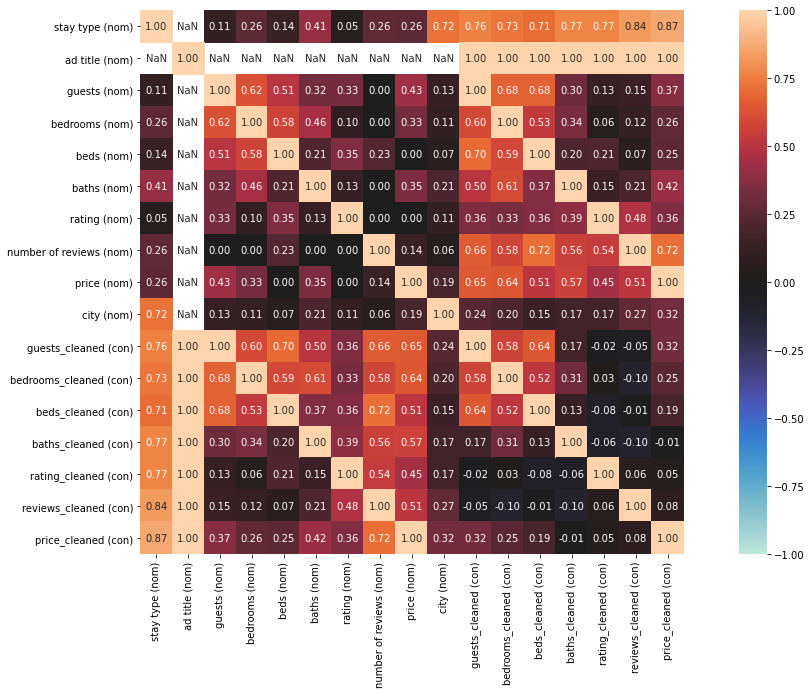

In [320]:
from dython import nominal
nominal.associations(stays_df,figsize=(20,10),mark_columns=True);

In [321]:
new_df = stays_df[['guests_cleaned', 'bedrooms_cleaned', 'beds_cleaned', 'baths_cleaned', 'rating_cleaned', 'reviews_cleaned', 'city', 'price_cleaned']]

In [322]:
new_df

,guests_cleaned,bedrooms_cleaned,beds_cleaned,baths_cleaned,rating_cleaned,reviews_cleaned,city,price_cleaned
0,2,1,1,1.0,4.58,220,New York,69.0
3,2,1,1,1.0,5.00,3,New York,50.0
4,2,1,1,1.0,4.75,16,New York,129.0
6,2,1,1,1.5,4.71,106,New York,100.0
7,3,1,1,1.0,5.00,13,New York,99.0
...,...,...,...,...,...,...,...,...
255,2,1,1,1.5,4.74,68,Philadelphia,36.0
256,4,2,2,1.0,4.87,15,Philadelphia,157.0
257,3,1,2,1.0,5.00,7,Philadelphia,82.0
258,2,1,1,1.0,4.83,6,Philadelphia,138.0


#### Finding correlation between categorical and continuous data:

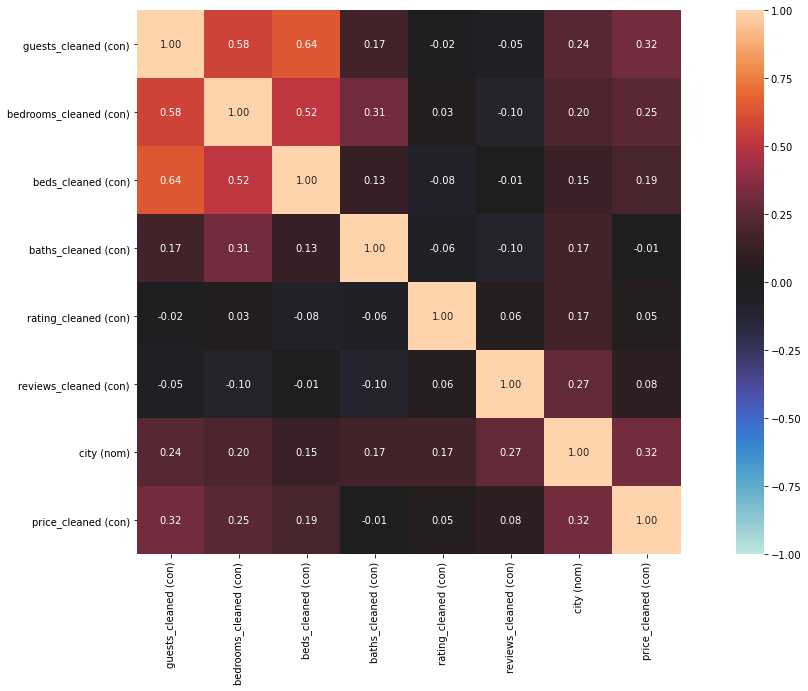

In [323]:
nominal.associations(new_df,figsize=(20,10),mark_columns=True);

#### Check for outliers in target column:

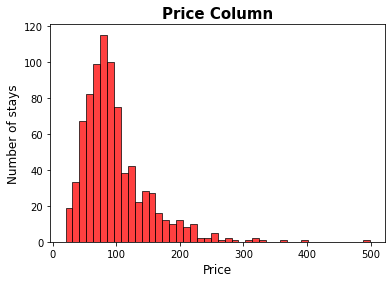

In [406]:
price_col = sns.histplot(new_df['price_cleaned'], color = 'Red')
price_col.set_xlabel('Price', size= 12) 
price_col.set_ylabel('Number of stays', size= 12)
price_col.set_title('Price Column', weight = 'bold', size =15)
price_col.figure.savefig("PriceColumn.png")

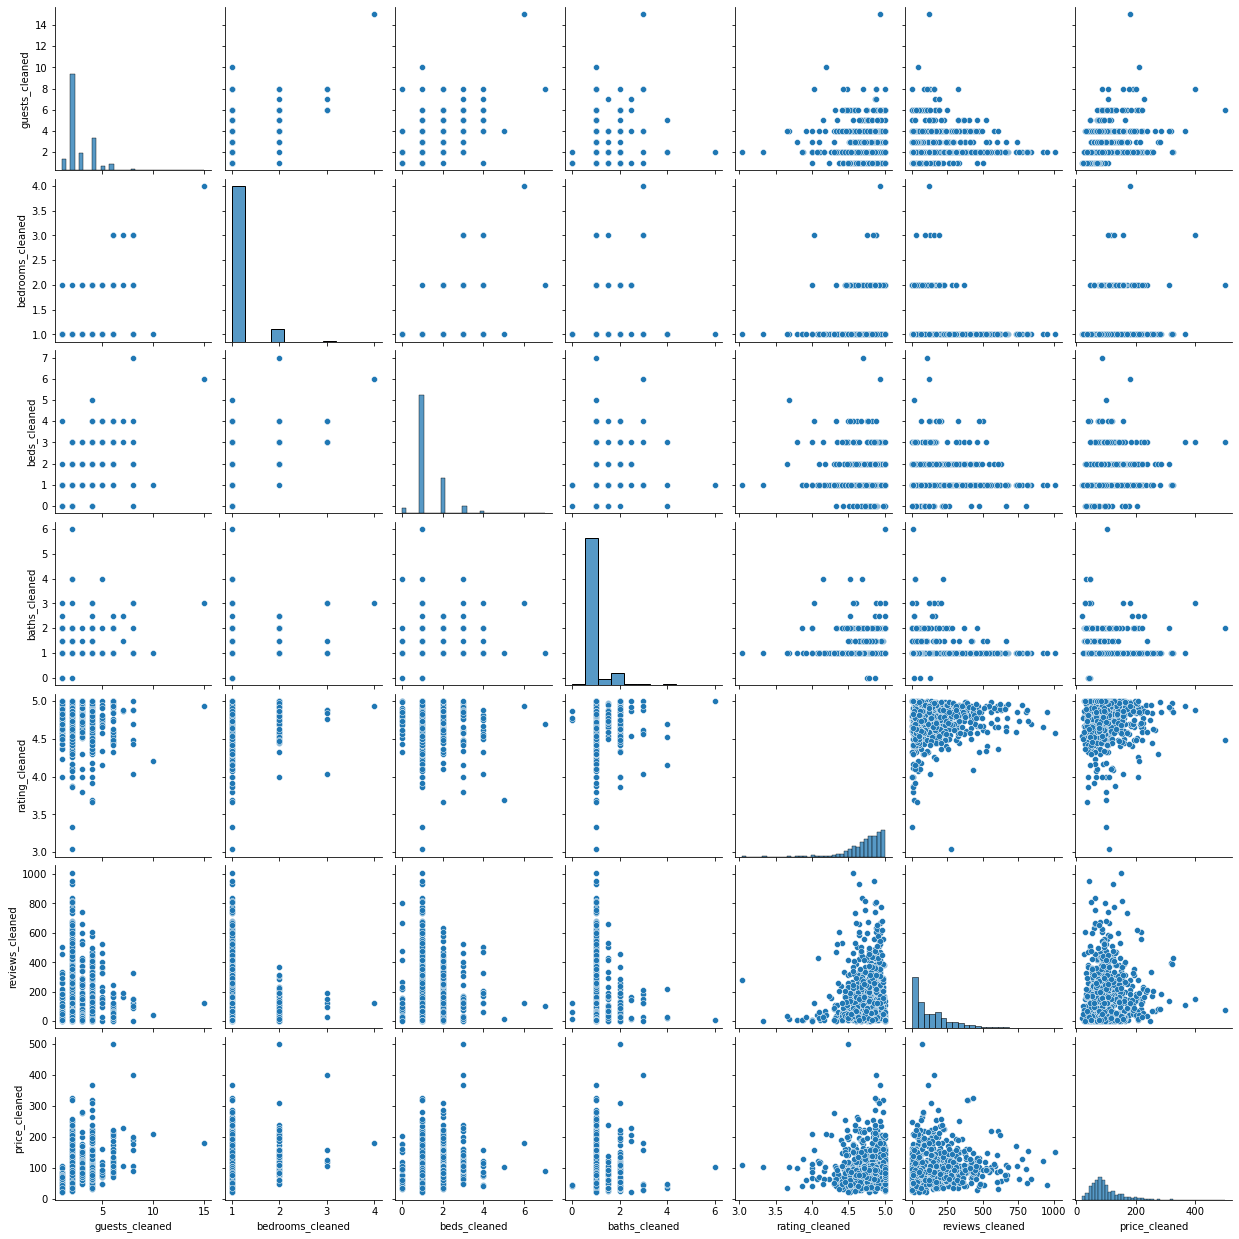

In [325]:
sns.pairplot(new_df)

#### Create dummy variables:

In [326]:
df = pd.get_dummies(new_df)

In [327]:
df.columns

Index(['guests_cleaned', 'bedrooms_cleaned', 'beds_cleaned', 'baths_cleaned',
       'rating_cleaned', 'reviews_cleaned', 'price_cleaned', 'city_Chicago',
       'city_Houston', 'city_Los Angeles', 'city_New York',
       'city_Philadelphia', 'city_San Diego'],
      dtype='object')

### Splitting the data

In [328]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [329]:
X = df.drop(['price_cleaned'], axis = 1)
y = df['price_cleaned']

In [330]:
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [331]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

In [332]:
def linear_reg(X_train,y_train,X_val,y_val):
    m = LinearRegression()
    m.fit(X_train,y_train)
    
    print("training score :", round(m.score(X_train,y_train) ,5))
    print("val score :", round(m.score(X_val,y_val),5))
    return m

### Baseline model:

In [413]:
baseline_model = linear_reg(X_train,
                            y_train,
                            X_val,
                            y_val)

training score : 0.22803
val score : 0.33279


for train data:

In [422]:
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X_train, y_train)  # perform linear regression
Y_pred = linear_regressor.predict(X_train) 

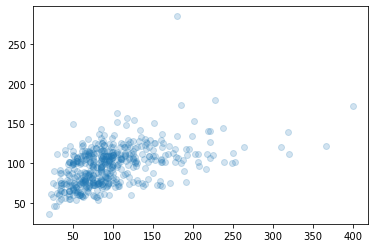

In [423]:
# visualize train 

plt.scatter(y_train, Y_pred, alpha = 0.2)
plt.show()

for validation data:

In [424]:
Y_pred = linear_regressor.predict(X_val) 

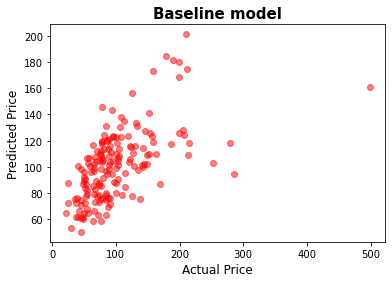

In [425]:
# visualize validation

plt.scatter(y_val, Y_pred, alpha = 0.5, color = 'Red')
plt.xlabel("Actual Price", size= 12)
plt.ylabel("Predicted Price", size= 12)
plt.title("Baseline model", weight = 'bold', size =15)
plt.savefig('BaselineModel.png')

### Linear regression using cross validation:

In [338]:
lm = LinearRegression()

val_list = cross_val_score(lm, np.concatenate([X_train,X_val]), np.concatenate([y_train, y_val]), # estimator, features, target
                cv=5, # number of folds 
                scoring='r2',
                          ) # scoring metric
np.mean(val_list)

0.1995735684434262

### using log

In [339]:
# log expr val
expr = linear_reg(X_train,
                    np.log(y_train),
                     X_val,
                     np.log(y_val)
                  )

training score : 0.26985
val score : 0.39703


using  log with cross validation:

In [440]:
# log val score with cv
lm = LinearRegression()

val_list_log = cross_val_score(lm, np.concatenate([X_train,X_val]), np.log(np.concatenate([y_train, y_val])), # estimator, features, target
                cv=5, # number of folds 
                scoring='r2',
                          ) # scoring metric
np.mean(val_list_log)


0.24452523126572673

### using polynomial 

In [426]:
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)
X_test_poly = poly.transform(X_test)

lm_poly = LinearRegression()

In [427]:
lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression train R^2: {lm_poly.score(X_train_poly, y_train):.3f}')
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')
print(f'Degree 2 polynomial regression test R^2: {lm_poly.score(X_test_poly, y_test):.3f}')

Degree 2 polynomial regression train R^2: 0.318
Degree 2 polynomial regression val R^2: 0.211
Degree 2 polynomial regression test R^2: 0.038


polynomial using cross validation:

In [428]:
poly = PolynomialFeatures(degree=2) 

val_list_poly = cross_val_score(lm, np.concatenate([X_train_poly,X_val_poly]), np.concatenate([y_train, y_val]), # estimator, features, target
                cv=5, # number of folds 
                scoring='r2',
                          ) # scoring metric
np.mean(val_list_poly)

-53.597660497074

### using LASSO (delete)

In [431]:
lasso_model = Lasso(alpha = 0.01) # this is a VERY HIGH regularization strength!, wouldn't usually be used
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.01)

In [432]:
lasso_model.score(X_train, y_train)

0.2280228253446689

In [433]:
lasso_model.score(X_val, y_val)

0.33217009268892683

LASSO using cross validation:

In [435]:
lasso_model = Lasso(alpha = 0.01)

val_list_lasso = cross_val_score(lasso_model, np.concatenate([X_train_poly,X_val_poly]), np.concatenate([y_train, y_val]), # estimator, features, target
                cv=5, # number of folds 
                scoring='r2',
                          ) # scoring metric
np.mean(val_list_lasso)

C:\Users\SDAIA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 465979.8466498328, tolerance: 163.65156329588015
  model = cd_fast.enet_coordinate_descent(
C:\Users\SDAIA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 439522.31921322265, tolerance: 157.19360823970038
  model = cd_fast.enet_coordinate_descent(
C:\Users\SDAIA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 405296.22741117206, tolerance: 137.32358651685394
  model = cd_fast.enet_coordinate_descent(
C:\Users\SDAIA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceW

-0.05631870197357096

### Using ridge:

In [441]:
lr_model_ridge = Ridge(alpha = 1)
lr_model_ridge.fit(X_train, y_train)

Ridge(alpha=1)

In [442]:
lr_model_ridge.score(X_train, y_train)

0.22798392165519898

In [443]:
lr_model_ridge.score(X_val, y_val)

0.3317383018714496

#### Ridge using cross validation:

In [445]:
val_list_ridge = cross_val_score(lr_model_ridge, np.concatenate([X_train,X_val]), np.concatenate([y_train, y_val]), # estimator, features, target
                cv=5, # number of folds 
                scoring='r2',
                          ) # scoring metric
np.mean(val_list_ridge)

0.19798591284962774

### Feature engineering 

In [351]:
df['rating flag'] = np.where(df['rating_cleaned'] < 4, 0, 1)

In [352]:
df['reviews flag'] = np.where(df['reviews_cleaned'] > 700, 0, 1)

In [353]:
df

,guests_cleaned,bedrooms_cleaned,beds_cleaned,baths_cleaned,rating_cleaned,reviews_cleaned,price_cleaned,city_Chicago,city_Houston,city_Los Angeles,city_New York,city_Philadelphia,city_San Diego,rating flag,reviews flag
0,2,1,1,1.0,4.58,220,69.0,0,0,0,1,0,0,1,1
3,2,1,1,1.0,5.00,3,50.0,0,0,0,1,0,0,1,1
4,2,1,1,1.0,4.75,16,129.0,0,0,0,1,0,0,1,1
6,2,1,1,1.5,4.71,106,100.0,0,0,0,1,0,0,1,1
7,3,1,1,1.0,5.00,13,99.0,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,2,1,1,1.5,4.74,68,36.0,0,0,0,0,1,0,1,1
256,4,2,2,1.0,4.87,15,157.0,0,0,0,0,1,0,1,1
257,3,1,2,1.0,5.00,7,82.0,0,0,0,0,1,0,1,1
258,2,1,1,1.0,4.83,6,138.0,0,0,0,0,1,0,1,1


### Linear regression with flag columns: 

In [355]:
X = df.drop(['price_cleaned'], axis = 1)
y = df['price_cleaned']

In [356]:
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [357]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

In [358]:
baseline_model = linear_reg(X_train,
                            y_train,
                            X_val,
                            y_val)

training score : 0.22803
val score : 0.33279


Linear regression with flag columns (CV):

In [359]:
lm = LinearRegression()

val_list_flags = cross_val_score(lm, np.concatenate([X_train,X_val]), np.concatenate([y_train, y_val]), # estimator, features, target
                cv=5, # number of folds 
                scoring='r2',
                          ) # scoring metric
np.mean(val_list_flags)

0.19543521998204086

#### Next, I re run the cells above to get the scores of different models (poly, ridge, etc.) with flag columns.